In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
pip install scikit-learn==1.4.2


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
crop= pd.read_csv('Crop_Recommendation.csv')
crop.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [5]:
crop.rename(columns={'Crop': 'label','Nitrogen':'N','Phosphorus':'P','Potassium':'K'}, inplace=True)

crop.head()


,N,P,K,Temperature,Humidity,pH_Value,Rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [6]:
crop.isnull().sum()

N              0
P              0
K              0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
label          0
dtype: int64

In [7]:
crop.shape

(2200, 8)

In [8]:
crop.describe()

,N,P,K,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
crop.drop_duplicates()

,N,P,K,Temperature,Humidity,pH_Value,Rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [11]:
crop.duplicated().sum()

0

In [12]:
crop.corr(numeric_only=True)

,N,P,K,Temperature,Humidity,pH_Value,Rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


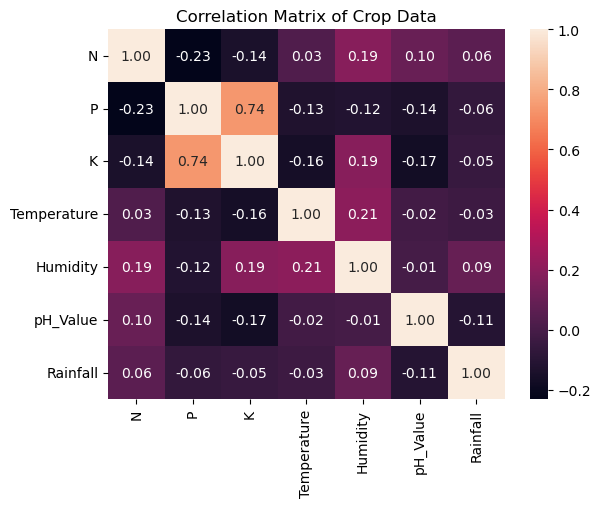

In [13]:
import seaborn as sns
sns.heatmap(crop.corr(numeric_only=True),annot=True,cbar=True,fmt = '.2f')
plt.title('Correlation Matrix of Crop Data')
plt.show()

In [14]:
crop.label.value_counts()

label
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

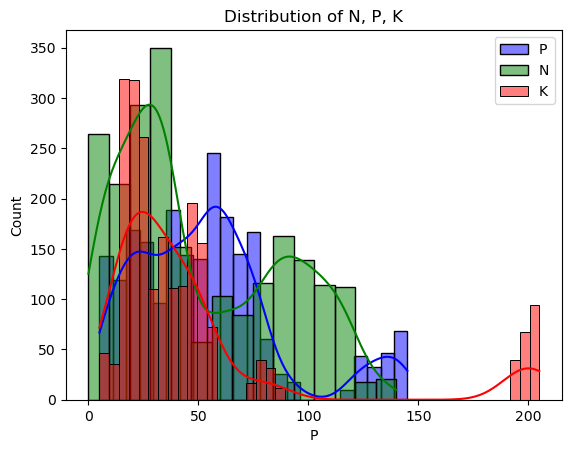

In [15]:
import matplotlib.pyplot as plt
sns.histplot(crop['P'], kde=True, color='blue', label='P')
sns.histplot(crop['N'], kde=True, color='green', label='N')
sns.histplot(crop['K'], kde=True, color='red', label='K')
plt.legend()
plt.title("Distribution of N, P, K")
plt.show()


In [16]:
crop.columns

Index(['N', 'P', 'K', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall',
       'label'],
      dtype='object')

In [17]:
crop.label.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [18]:
crop.shape

(2200, 8)

In [19]:
crop_dict = {'Rice':1,
            'Maize':2,
            'ChickPea':3,
            'KidneyBeans':4,
            'PigeonPeas':5,
            'MothBeans':6,
            'MungBean':7,
            'Blackgram':8,
            'Lentil':9,
            'Pomegranate':10,
            'Banana':11,
            'Mango':12,
            'Grapes':13,
            'Watermelon':14,
            'Muskmelon':15,
            'Apple':16,
            'Orange':17,
            'Papaya':18,
            'Coconut':19,
            'Cotton':20,
            'Jute':21,
            'Coffee':22
             }

In [20]:
crop['label'] = crop['label'].map(crop_dict)

In [21]:
crop.head()

,N,P,K,Temperature,Humidity,pH_Value,Rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [22]:
crop.isnull().sum()

N              0
P              0
K              0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
label          0
dtype: int64

In [23]:
x=crop.drop('label', axis = 1)
y=crop['label']


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [25]:
x_train.shape

(1760, 7)

In [26]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
x_train = mx.fit_transform(x_train)
x_test = mx.transform(x_test)

In [27]:
x_train


array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [30]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [31]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9636363636363636
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9681818181818181
KNeighborsClassifier model with accuracy: 0.9659090909090909
DecisionTreeClassifier model with accuracy: 0.9818181818181818
ExtraTreeClassifier model with accuracy: 0.9159090909090909
RandomForestClassifier model with accuracy: 0.9931818181818182
BaggingClassifier model with accuracy: 0.9863636363636363
GradientBoostingClassifier model with accuracy: 0.9818181818181818


C:\Users\ADMIN\anaconda4\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model with accuracy: 0.09545454545454546


In [32]:
randclf = RandomForestClassifier()
randclf.fit(x_train, y_train)
y_pred = randclf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

In [33]:





# def recommendation(N,P,K,temperature,humidity,ph,rainfall):
#     features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
#     mx_features = mx.transform(features)
#     sc_mx_features = sc.transform(mx_features)
#     prediction = randclf.predict(sc_mx_features).reshape(1,-1)
#     return prediction[0]

In [34]:
def recommendation(N, P, K, Temperature, Humidity, pH_Value, Rainfall):
    features = np.array([[N, P, K, Temperature, Humidity, pH_Value, Rainfall]])

    # Use already fitted scalers (DON'T fit again)
    mx_features = mx.transform(features)
    sc_mx_features = sc.transform(mx_features)

    prediction = randclf.predict(sc_mx_features)
    return prediction[0]


In [35]:
crop.head()

,N,P,K,Temperature,Humidity,pH_Value,Rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [43]:
crop.tail(30)

,N,P,K,Temperature,Humidity,pH_Value,Rainfall,label
2170,114,20,26,25.556567,62.670878,7.279057,193.586623,22
2171,117,26,30,27.923744,67.969109,7.079851,115.232553,22
2172,111,29,31,26.059684,52.310985,6.136287,161.343254,22
2173,119,30,28,26.357709,64.575780,6.505204,163.626950,22
2174,116,40,33,24.913705,54.153192,7.042089,129.548114,22
2175,95,37,35,27.313171,68.423339,6.348338,192.428814,22
2176,86,40,33,26.138787,52.263117,7.432322,136.302777,22
2177,117,37,32,23.106938,67.062305,6.787659,162.576961,22
2178,105,18,35,23.526481,68.440307,6.743417,171.883994,22
2179,109,23,25,25.117110,68.480304,7.007332,194.877348,22


In [37]:
N=107
P= 55
K= 44
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)
predict

C:\Users\ADMIN\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1

In [38]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))

In [39]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Try two very different inputs:
print(model.predict([[107, 45, 55, 44, 20.879744, 82.002744, 202.935536]]))  # Common for rice
print(model.predict([[10, 10, 10, 35, 30, 8.0, 50]]))   # Common for grapes or orange


[16]
[16]


In [40]:
# from flask import Flask, render_template, request
# import numpy as np
# import pickle

# app = Flask(__name__)

# # Load model and scalers
# with open('model.pkl', 'rb') as f:
#     model = pickle.load(f)
# with open('minmaxscaler.pkl', 'rb') as f:
#     minmax = pickle.load(f)
# with open('standscaler.pkl', 'rb') as f:
#     standard = pickle.load(f)

# # Crop label mapping (update based on your dataset if needed)
# crop_labels = model.classes_  # Assumes classifier has 'classes_' attribute

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict', methods=['POST'])
# def predict():
#     try:
#         values = []
#         for x in ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']:
#             val = request.form.get(x, '').strip()
#             if val == '':
#                 return render_template('index.html', prediction_text="Error: All fields are required.")
#             values.append(float(val))

#         # Preprocess input
#         values = np.array([values])
#         scaled = standard.transform(minmax.transform(values))
#         prediction = model.predict(scaled)[0]

#         return render_template('index.html', prediction_text=f"Recommended Crop: {prediction.capitalize()}")

#     except Exception as e:
#         return render_template('index.html', prediction_text=f"Error: {e}")

# if __name__ == '__main__':
#     app.run(debug=True)
